# WINE QUALITY PREDICTION MODEL

#### importing the libraries and load the dataset..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
w=pd.read_csv("C://Users//ANKITA GHOSH//Downloads//winequalityN.csv")

In [3]:
w

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
w['type'].unique()

array(['white', 'red'], dtype=object)

In [5]:
w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## HANDLING MISSING VALUE

In [6]:
w.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
w.dropna(inplace=True)

In [8]:
w.shape

(6463, 13)

## CHECK DUPLICATE RECORDS

In [9]:
w.shape

(6463, 13)

In [10]:
duplicate=w.duplicated()
print(duplicate.sum())
w[duplicate]

1168


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


## DROPPING DUPLICATES

In [11]:
w.drop_duplicates(inplace=True)

In [12]:
w.shape

(5295, 13)

In [13]:
duplicate=w.duplicated()
print(duplicate.sum())
w[duplicate]

0


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## data - WINE QUALITY VISUALISATION

In [14]:
print(w.quality.value_counts())
print(w.type.value_counts())

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64
white    3942
red      1353
Name: type, dtype: int64


C:\Users\ANKITA GHOSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANKITA GHOSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


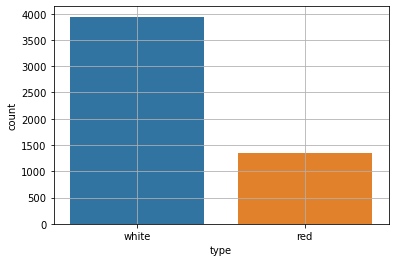

In [15]:
sns.countplot(w['quality'])
sns.countplot(w['type'])
plt.grid()
plt.show()

## CORRELATION MATRIX

In [16]:
w.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.216524,0.329252,-0.106084,0.289903,-0.282025,-0.328631,0.478920,-0.269624,0.307044,-0.103657,-0.079599
volatile acidity,0.216524,1.000000,-0.382750,-0.164438,0.368266,-0.349784,-0.401231,0.308416,0.245329,0.226537,-0.066781,-0.265214
citric acid,0.329252,-0.382750,1.000000,0.146528,0.055266,0.130802,0.194231,0.095824,-0.342648,0.062121,-0.005124,0.097926
residual sugar,-0.106084,-0.164438,0.146528,1.000000,-0.123115,0.399579,0.487534,0.520194,-0.233319,-0.174663,-0.305311,-0.054625
chlorides,0.289903,0.368266,0.055266,-0.123115,1.000000,-0.187312,-0.270009,0.372126,0.025963,0.405771,-0.270196,-0.202016
free sulfur dioxide,-0.282025,-0.349784,0.130802,0.399579,-0.187312,1.000000,0.721308,0.005827,-0.141368,-0.199005,-0.169854,0.053786
total sulfur dioxide,-0.328631,-0.401231,0.194231,0.487534,-0.270009,0.721308,1.000000,0.005974,-0.222003,-0.275389,-0.247779,-0.050728
density,0.478920,0.308416,0.095824,0.520194,0.372126,0.005827,0.005974,1.000000,0.034979,0.283042,-0.668950,-0.325338
pH,-0.269624,0.245329,-0.342648,-0.233319,0.025963,-0.141368,-0.222003,0.034979,1.000000,0.166139,0.096615,0.038903
sulphates,0.307044,0.226537,0.062121,-0.174663,0.405771,-0.199005,-0.275389,0.283042,0.166139,1.000000,-0.019008,0.041806


<AxesSubplot:>

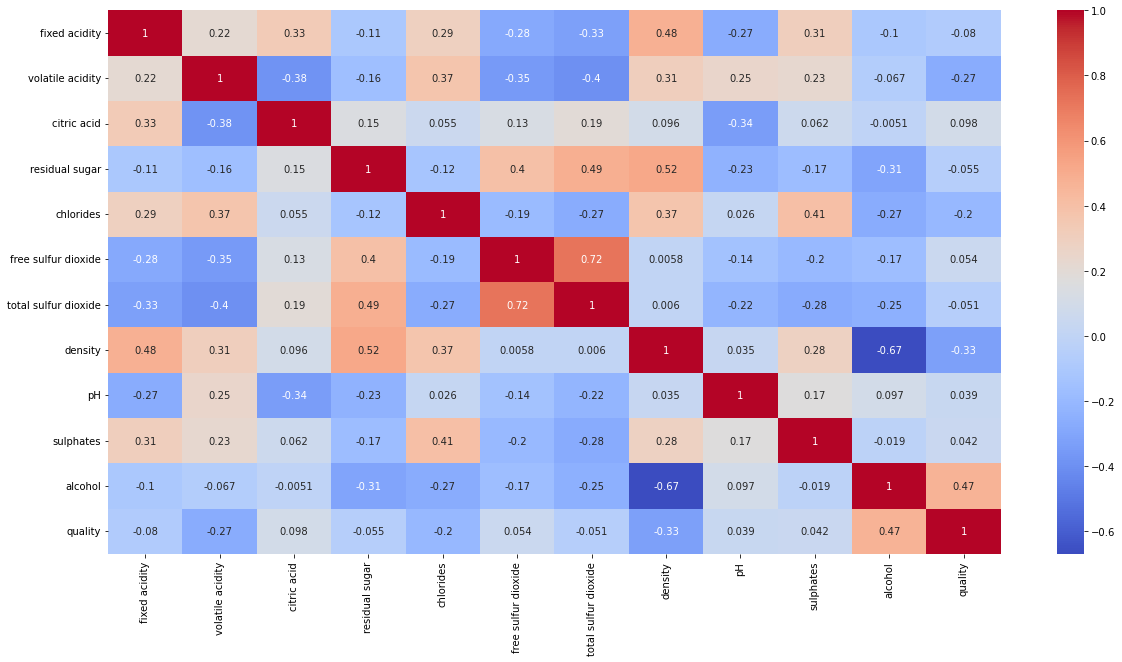

In [17]:
corr=w.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

## devide the dataframe into
                      INDEPENDENT AND DEPENDENT VARIABLE

In [18]:
p=w.iloc[:,:-1].values
q=w.iloc[:,-1].values

In [19]:
p

array([['white', 7.0, 0.27, ..., 3.0, 0.45, 8.8],
       ['white', 6.3, 0.3, ..., 3.3, 0.49, 9.5],
       ['white', 8.1, 0.28, ..., 3.26, 0.44, 10.1],
       ...,
       ['red', 6.2, 0.6, ..., 3.45, 0.58, 10.5],
       ['red', 5.9, 0.645, ..., 3.57, 0.71, 10.2],
       ['red', 6.0, 0.31, ..., 3.39, 0.66, 11.0]], dtype=object)

In [20]:
q

array([6, 6, 6, ..., 5, 5, 6], dtype=int64)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ct=ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[0])],remainder="passthrough")
le=LabelEncoder()
x=np.array(ct.fit_transform(p))
y=le.fit_transform(q)

In [22]:
x

array([[0.0, 1.0, 7.0, ..., 3.0, 0.45, 8.8],
       [0.0, 1.0, 6.3, ..., 3.3, 0.49, 9.5],
       [0.0, 1.0, 8.1, ..., 3.26, 0.44, 10.1],
       ...,
       [1.0, 0.0, 6.2, ..., 3.45, 0.58, 10.5],
       [1.0, 0.0, 5.9, ..., 3.57, 0.71, 10.2],
       [1.0, 0.0, 6.0, ..., 3.39, 0.66, 11.0]], dtype=object)

In [23]:
y

array([3, 3, 3, ..., 2, 2, 3], dtype=int64)

# splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
x_train

array([[0.0, 1.0, 5.2, ..., 3.24, 0.54, 10.0],
       [0.0, 1.0, 6.5, ..., 3.19, 0.39, 8.5],
       [0.0, 1.0, 6.8, ..., 3.15, 0.45, 11.0],
       ...,
       [0.0, 1.0, 7.0, ..., 3.5, 0.44, 9.6],
       [0.0, 1.0, 5.2, ..., 3.14, 0.31, 12.4],
       [0.0, 1.0, 6.7, ..., 2.96, 0.39, 12.5]], dtype=object)

## FEATURE SCALING-----STANDARDIZATION

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
x_train

array([[-0.57861033,  0.57861033, -1.53107719, ...,  0.10832077,
         0.04703009, -0.45798938],
       [-0.57861033,  0.57861033, -0.55100021, ..., -0.20523936,
        -0.95202381, -1.72308868],
       [-0.57861033,  0.57861033, -0.3248286 , ..., -0.45608746,
        -0.55240225,  0.38541015],
       ...,
       [-0.57861033,  0.57861033, -0.17404753, ...,  1.73883345,
        -0.61900584, -0.79534919],
       [-0.57861033,  0.57861033, -1.53107719, ..., -0.51879949,
        -1.48485255,  1.5661695 ],
       [-0.57861033,  0.57861033, -0.40021914, ..., -1.64761596,
        -0.95202381,  1.65050945]])

# training the decision tree classifier model on the whole dataset

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# predicting.....................

In [29]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[4 3]
 [0 1]
 [3 3]
 ...
 [1 1]
 [3 3]
 [5 3]]


In [30]:
y_pred=classifier.predict([[0.0,1.0,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9]])
print(y_pred)

[3]


In [31]:
print(' so the quality of the wine on a scale of 1 to 10 is : ', y_pred)

 so the quality of the wine on a scale of 1 to 10 is :  [3]
